In [1]:
from setup_env import setup_environment

setup_environment()

In [2]:
from project.wfc.factory import Factory
from project.wfc.grid import Grid, Rect
from project.visualization.grid_renderer import grid_renderer
from project.config import DATA_SOURCE
from project.wfc.repository import repository
from project.wfc.wfc import WFC
from project.wfc.advisor import RandomAdvisor
from project.wfc.judge import AlwaysContinueJudge, RandomJudge
from project.wfc.history import GenerationHistory, GenerationResult
from project.visualization.grid_renderer import TextToShow

In [6]:
factory = Factory(DATA_SOURCE)

patterns = factory.create_patterns()

rect = Rect(width=15, height=15)

grid = Grid(rect=rect, patterns=repository.get_all_patterns())

judge = AlwaysContinueJudge()
judge = RandomJudge(rollback_chance=0.05)

advisor = RandomAdvisor()

history = GenerationHistory()

wfc = WFC(grid=grid, judge=judge, advisor=advisor)

INFO - Validation Result: success



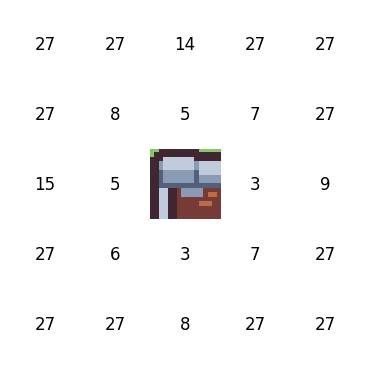

In [26]:
if wfc.step(early_stopping=True).success:
    grid_renderer.draw(
        grid=grid,
        show_borders=False,
        seed=100,
        show=True,
        text_to_show=TextToShow.ENTROPY,
    )

In [31]:
wfc.step(early_stopping=True)

StepResult(success=False, chosen_point=None, chosen_pattern=None, outcome=<FailOutcome.ROLLBACK_LIMIT_EXCEEDED: 4>, failed_point=None)

In [7]:
TARGET = 1
tries = 0

for _ in range(TARGET):
    is_succeeded = False
    while not is_succeeded:
        tries += 1
        is_succeeded = wfc.generate()
        steps = wfc.history.steps
        history_result = GenerationResult(
            success=is_succeeded, snapshots=wfc.history.snapshots
        )
        history.add(history_result)
    history.serialize()
    # wfc.grid.serialize("data/grids/wfc/test/")

tries / TARGET

8.0

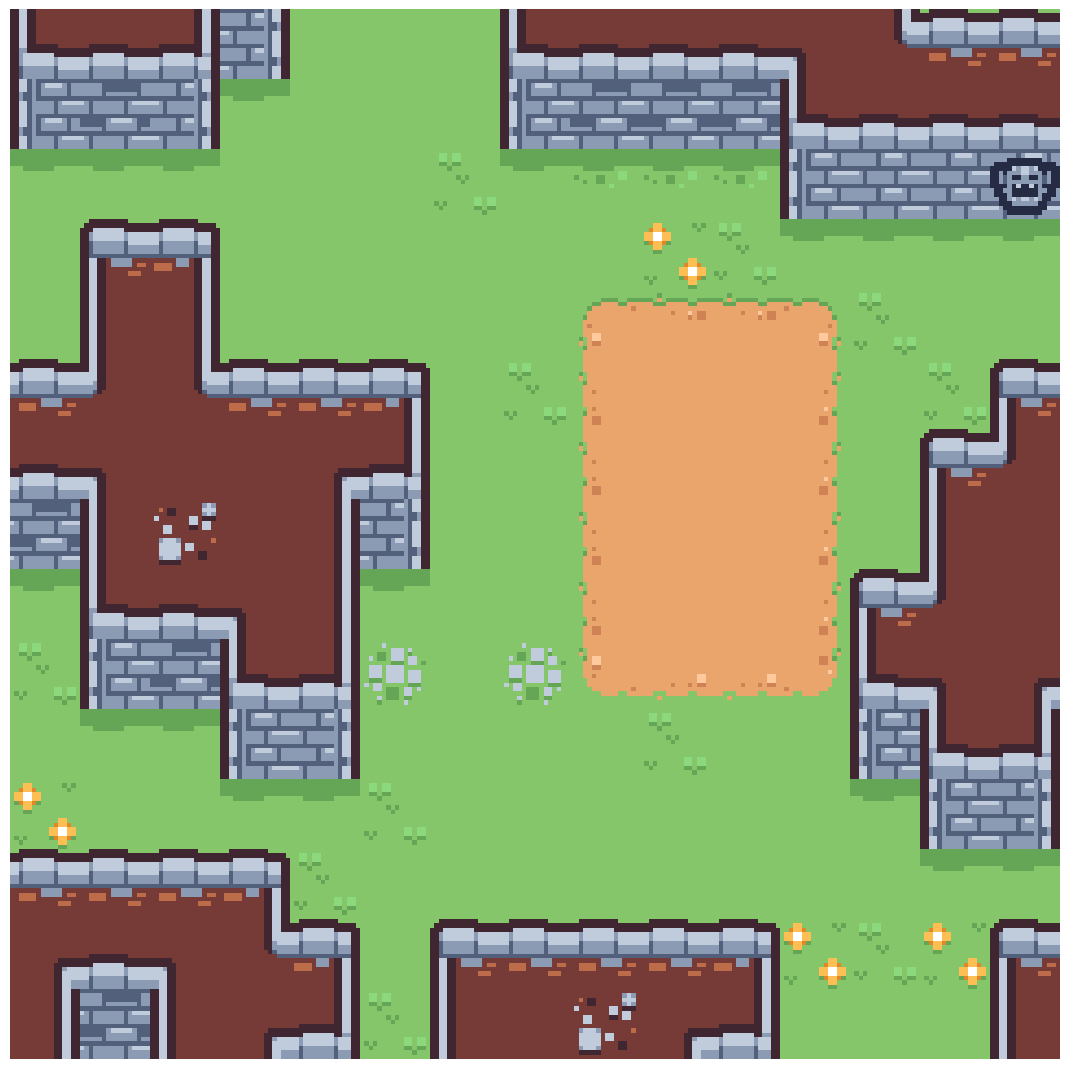

In [8]:
grid_renderer.draw(
    grid=grid,
    show_borders=False,
    seed=42,
    show_image=True,
    text_to_show=TextToShow.HEIGHT,
)